## Задания

### Задание 2.1

Вам предоставлен словарь products, ключами которого являются названия продуктов, а значениями — их цены. Затем к вам приходит другой словарь (stocks), ключи которого — товары, а значения — скидки (в процентах) на товары.

Напишите функцию apply_discounts(products, stocks), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены. Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.

Пример работы программы:

In [3]:
def apply_discounts(products, stocks):
    for name, price in products.items():
        discount = stocks.get(name)
        if discount:
            print(discount[0:-1])
            products[name] = round( products[name] * (100 - int(discount[0:-1])) / 100, 2)
    return products

In [4]:
products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}

print(apply_discounts(products, stocks))

## {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 
# 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


33
12
18
{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


### Задание 2.2

Вам даны два файла bronze_top.csv и silver_top.csv, в которых хранится информация о ТОП-5 стран по числу бронзовых и серебряных медалей соответственно. В каждой таблице два одинаковых столбца: Country — страна и Total — число медалей.

Создайте два DataFrame на основе заданных csv-файлов. Объедините таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые попали в оба рейтинга. При этом в качестве суффиксов укажите строки "_bronze" и "_silver", чтобы столбцы таблиц, не участвовавших в объединении, можно было различать.

Результирующий DataFrame занесите в переменную merged. В нём должны быть следующие столбцы:

Country
Total_bronze
Total_silver
Не забудьте добавить в свой код импорт библиотеки pandas.

Также обратите внимание, что для отправки решения на проверку выводить результат на экран не нужно.

In [ ]:
import pandas as pd

bronze_df = pd.read_csv('bronze_top.csv')
silver_df = pd.read_csv('silver_top.csv')

# print(bronze_df)
# print(silver_df)

merged = pd.merge(left=bronze_df, right=silver_df, how='inner', on='Country', suffixes=['_bronze', '_silver'] )

# print(merged)

## 3. Практические задания в Jupyter Notebook

In [35]:
import pandas as pd
import numpy as np

solar_data = pd.read_csv('data/solarpower.zip')
solar_data.head()


,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [36]:
solar_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [37]:
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       664 non-null    datetime64[ns]
 1   cum_power  664 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.5 KB


In [38]:
solar_data[solar_data['cum_power'] == -1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [39]:

for element in solar_data[solar_data['cum_power'] == -1].iterrows():
    (id, series) = element
    solar_data.at[id, 'cum_power'] = (solar_data.at[id - 1, 'cum_power'] + solar_data.at[id + 1, 'cum_power']) / 2
    print('Новое значение:', solar_data.at[id, 'cum_power'])

Новое значение: 20255.0
Новое значение: 27998.0


In [49]:
solar_data['day_power'] = solar_data['cum_power'].diff()

solar_data.groupby(solar_data['date'].dt.to_period('M'))['day_power'].mean()


date
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

C:\Users\voidozer\AppData\Local\Temp\ipykernel_24044\2283654172.py:9: FutureWarning:

A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.



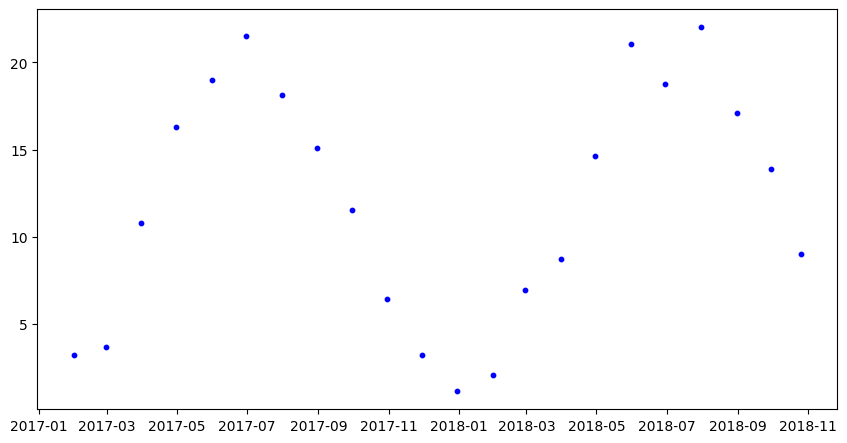

In [58]:
import matplotlib.pyplot as plt

df = solar_data.groupby(solar_data['date'].dt.to_period('M'), as_index=False)

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x = df['date'].last(), 
    y = df['day_power'].mean(), 
    s = 10,
    marker='o',
    c = 'blue'
);